#Decision Tree Classifier

In [7]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd

# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)


df["Cluster"]=iris.target
print(df.head(5))
#y=iris.target
#print(y)

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  Cluster
0                5.1               3.5  ...               0.2        0
1                4.9               3.0  ...               0.2        0
2                4.7               3.2  ...               0.2        0
3                4.6               3.1  ...               0.2        0
4                5.0               3.6  ...               0.2        0

[5 rows x 5 columns]


## Understanding the Data


I have downloaded a Iris dataset from sklearn  
which contains the following data
- **sepal length (cm)** e.g. 5.1
- **sepal width (cm)** e.g. 3.1
- **petal length (cm)** e.g. 1.3
- **petal width (cm)** e.g. 0.2
- **Cluster** 0/1/2


---
## Setting up the Decision Tree
We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.


In [8]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [11]:

y=df['Cluster']
X=pd.DataFrame(iris.data, columns=iris.feature_names)
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

## Modeling
We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>dTree</b>.<br>
Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.

In [14]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion="entropy")
dtree.fit(X_trainset,y_trainset)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


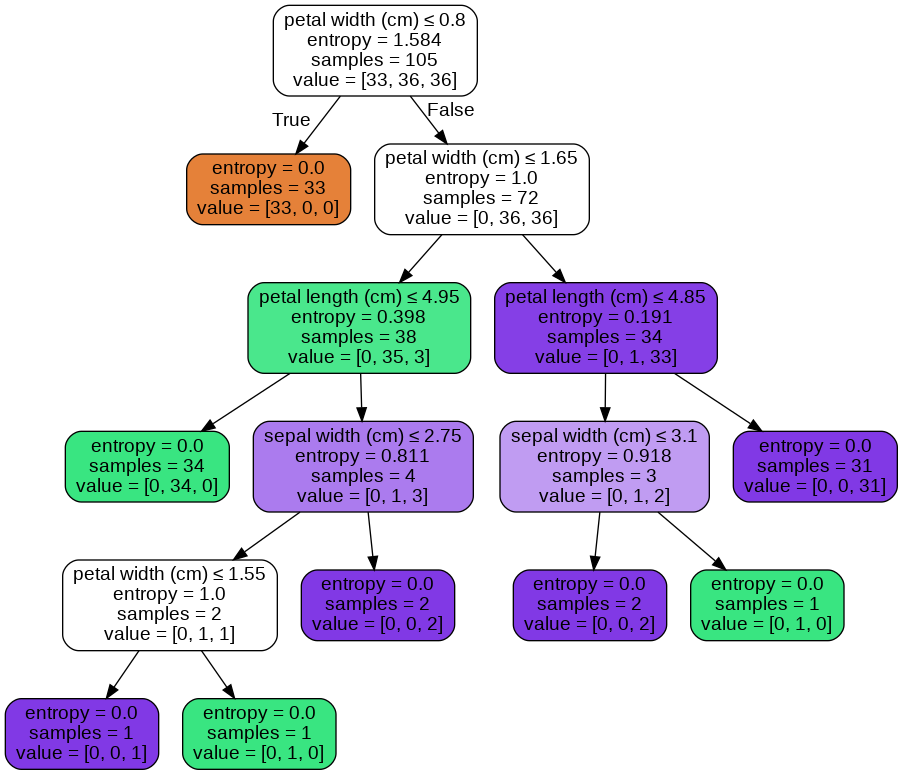

In [16]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Prediction
Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.

In [20]:
predTree = dtree.predict(X_testset)

## Evaluation
Next, let's import __metrics__ from sklearn and check the accuracy of our model.

In [21]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9777777777777777


__Accuracy classification score__ computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

We are getting accracy of **97.77%** which is  very good 

Lets Plot the confusion matrix of the result

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

Text(27.599999999999998, 0.5, 'Predicted label')

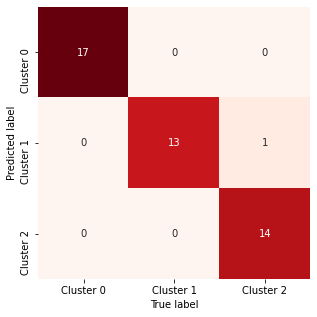

In [28]:
cm = confusion_matrix(y_testset, predTree)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, ax=ax,square=True, annot=True, cmap="Reds", cbar=False,
xticklabels=["Cluster 0","Cluster 1","Cluster 2"], yticklabels=["Cluster 0","Cluster 1","Cluster 2"])
plt.xlabel("True label")
plt.ylabel("Predicted label")

As we can see from confusion only 1 data is misclassified